# In-Class Activity: Linear Motion

In this activity, we'll be using sensory data you collect on your phone with either [PhyPhox](https://phyphox.org/) or [Physics Toolbox](https://www.vieyrasoftware.net/). 

With the linear accelerometer, we'll first measure the motion of our phone, and then use the data we collected to calculate the displacement (distance) our phone traveled.


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

First, we need to import the csv file as a data frame

_NOTE: You have a few options for which data file to use_:
- You can  use the data file you downloaded from Canvas
- Or, after Prof. W-B uploads the demo file, you can download that from Google Drive
- Or even better...use your own data file!

In [7]:
df = pd.read_csv("podium.csv")

Examine the data frame -- how many rows and columns does it contain? What information is in each column?

In [10]:
# Use .describe to examine the columns

df

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2)
0,0.013776,-0.0084,-0.0099,-0.0234,0.027
1,0.033576,0.0086,-0.0067,0.0041,0.012
2,0.051544,0.0111,-0.0081,-0.0053,0.015
3,0.070566,0.0038,-0.0056,-0.0043,0.008
4,0.090209,-0.0046,-0.0080,-0.0076,0.012
...,...,...,...,...,...
1128,21.512204,0.0010,-0.0021,-0.0041,0.005
1129,21.528911,0.0060,-0.0019,-0.0017,0.007
1130,21.547840,0.0060,-0.0007,0.0008,0.006
1131,21.567467,0.0015,-0.0067,0.0008,0.007


Now, let's make some plots of the data (because there's too much of it to really grasp just by looking at a table...).

In [78]:
# First, we can use .plot() to show all of the columns at once

# What are the values on the a-axis?

# Ask yourself: What is happening with each line )(time, ax, ay, az, aT)?

<Axes: >

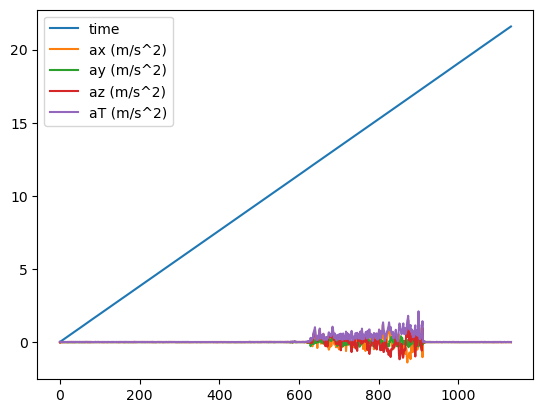

In [11]:
df.plot()

Or we can look at individual columns in isolation...

First let's look at the z-acceleration:

<Axes: >

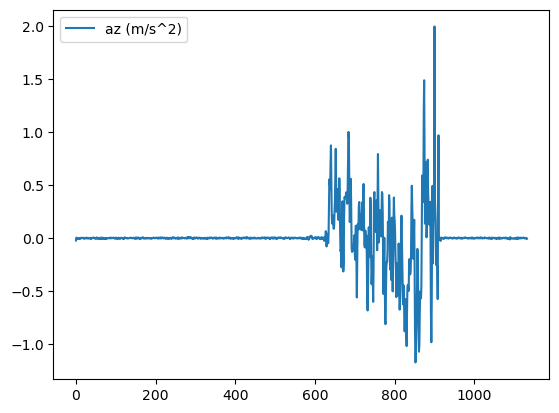

In [14]:
df.plot(y="az (m/s^2)")


# HINT: we can specify the y-axis of our plot by giving it a column name
# OR, we can select a specific column first, then do .plot() on it

How many points of data before it starts to move?

Can  you describe the motion just by looking at this plot?

_Note: Notice how it *seems* to start to 0... but it's a good practice to calibrate our sensor (even though we did it in the app)._

We can do this by calculating the baseline value (which is close to 0, but not exactly 0) and subtracting it out.

In [15]:
# First we calculate the z baseline by averaging the first 100 rows of data

# Remember how to select specific rows? 
# We first use .iloc to select, then we can use .mean() on that selection.

z_baseline = df["az (m/s^2)"].iloc[:575].mean()

In [17]:
# Now let's make a new column where we substract out the baseline from the z acceleration

df["z_accel"] = df["az (m/s^2)"] - z_baseline

Next, we are going to do numerical integration (remember physics?) to figure out:

a) the velocity
b) the linear displacement

To do that, we need to know the _time interval_ of each row, dt (change in time between each row).

In [27]:
# How do we figure out the time interval (dt)?

# First, figure out the LAST time stamp in our data set

# Hint: We can use .iloc again, and we can tell it to select the last (-1) row
dt = df["time"].iloc[-1] / df.shape[0]

In [25]:
df["time"][355] - df["time"][354]

0.01825600000000005

In [ ]:
# YOUR CODE HERE

In [91]:
# That value represents the elapsed (total) time
# Next, we can divide that the elapsed time by the number of rows 
# This tells us how big each time step is

# Remember, we can use .shape to tell us the size of a data frame or a series (rows and colums)...
# And df.shape[0] will tell us how many rows 

In [23]:
# Calculate dt

# YOUR CODE HERE



*Now onto numeric intergration!*

We'll use .cumsum(), which tells us the cumulative sum of a column. You can read more about how it works here: [https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)

First, let's calculate the velocity for the z axis.

In [28]:
# We'll add a new z velocity column, which we get by numerically integrating the z acceleration
# We do this by multiplying the .cumsum of the z acceleration by the timestep, dt
# So, z velocity = z-acceleration.cumsum() * dt

df["velocity z (m/s)"] = df["z_accel"].cumsum()*dt

<Axes: >

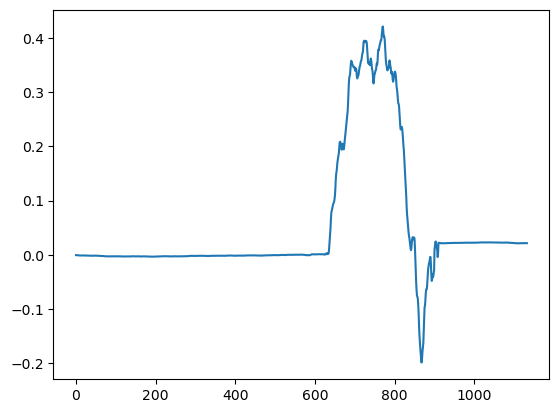

In [30]:
df["velocity z (m/s)"].plot()

In [25]:
# And now let's plot the resulting z-velocity column

# YOUR CODE HERE

In [31]:
# Finally, we can numerically integrate *again* to find the z position!
# Let's make a new column for the z position
# Again, we multiply .cumsum() by the timestep, dt

# z position:

df["z position (m)"] = df["velocity z (m/s)"].cumsum()*dt


<Axes: >

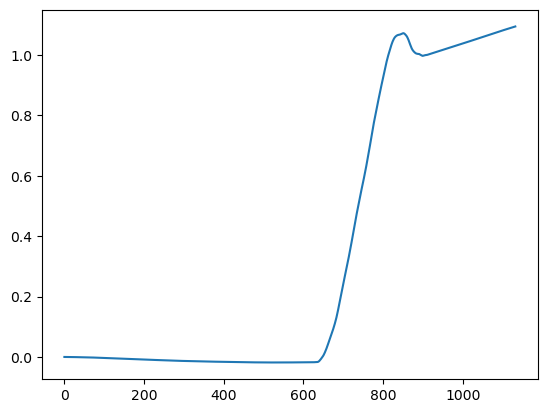

In [33]:
# And let's plot it z-position:

df["z position (m)"].plot()


In [35]:
# What is the final height? How would you find it?

# We can average the ending value (similar to how we did the baseline)

df["z position (m)"].iloc[820]

1.0294164058165745

Note: Does your data look weird? (Mine does!) That's ok...remember, sensors aren't perfect (especially ones that you carry around in your pocket and drop all the time). Try to describe the weirdness. Is there a way to you do some additional data processing to fix it?

In [29]:
# YOUR CODE HERE

### Challenge 1: Using what you learned in Datacamp, make your plots easier to read

(Remember, we can also use plt.plot() and plt.show(), which is slightly different syntax that what we did above.)

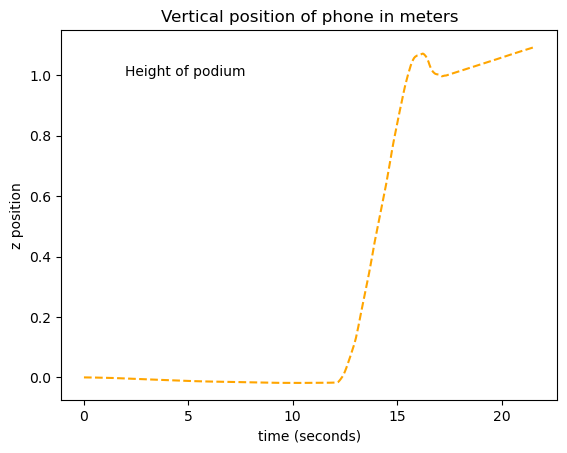

In [48]:
# SOME THINGS YOU COULD DRY:

# Plot time (in seconds) on the x-axis instead of rows
# Change the line color and line style
# Add a title
# Add an annotation for the final height

plt.plot(df.time, df["z position (m)"], linestyle='--', color="orange")
plt.title("Vertical position of phone in meters")
plt.ylabel("z position")
plt.xlabel("time (seconds)")
plt.text(2, 1, "Height of podium")
plt.show()


### Challenge 2: Measure the height of different objects in the room

### Challenge 2b: Measure the height of an object in the room, but this time using either the g-force meter (Physics Toolbox) or Acceleration with g (PhyPhox)
How is it different?

### Challenge 3: Look at the other axes (x and y) -- what is going on with them?

Try ploting the x, y, and z displacements on one plot.

### Challenge 4a: With your group, start working on the group project

Measure the height of one of your teammates with *all* group members' phones.

### Challenge 4b: With your group start discussing what *other* sensor you will use
Or what *other* experiment you can do with the linear accelerometer